In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [81]:
train_data = pd.read_csv('open/train.csv')

In [82]:
train_data.head()

,ID,label,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,TRAIN_000,building,251,196,51,63,68,78,189,34,...,85,195,63,30,73,65,63,201,251,248
1,TRAIN_001,building,247,184,203,237,255,255,193,255,...,242,239,241,242,242,241,241,241,240,238
2,TRAIN_002,building,217,223,232,231,239,212,109,115,...,96,90,103,166,191,163,190,190,206,231
3,TRAIN_003,cat,133,149,153,138,68,157,159,166,...,245,241,247,255,250,190,186,244,254,201
4,TRAIN_004,building,240,213,187,159,112,134,239,233,...,148,59,163,133,92,196,221,194,182,251


In [83]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,...,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,204.763329,200.617685,198.704811,197.136541,194.245774,193.608583,188.739922,185.530559,184.161248,182.566970,...,156.827048,162.375813,165.193758,166.347204,167.945384,172.371912,180.118336,188.215865,192.644993,192.314694
std,57.652616,60.229288,62.543943,62.669402,64.572579,63.898491,66.509515,70.378344,70.131703,71.222005,...,79.472545,77.702930,76.422126,76.554058,76.944072,75.648753,71.514005,69.306537,67.327055,65.509460
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,193.000000,178.000000,175.000000,168.000000,165.000000,164.000000,152.000000,145.000000,142.000000,136.000000,...,86.000000,101.000000,104.000000,101.000000,106.000000,112.000000,130.000000,146.000000,158.000000,157.000000
50%,228.000000,228.000000,228.000000,227.000000,223.000000,221.000000,217.000000,215.000000,212.000000,210.000000,...,176.000000,182.000000,186.000000,189.000000,194.000000,196.000000,203.000000,219.000000,222.000000,220.000000
75%,245.000000,245.000000,245.000000,243.000000,242.000000,242.000000,241.000000,241.000000,240.000000,240.000000,...,231.000000,237.000000,237.000000,237.000000,238.000000,238.000000,240.000000,242.000000,243.000000,243.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


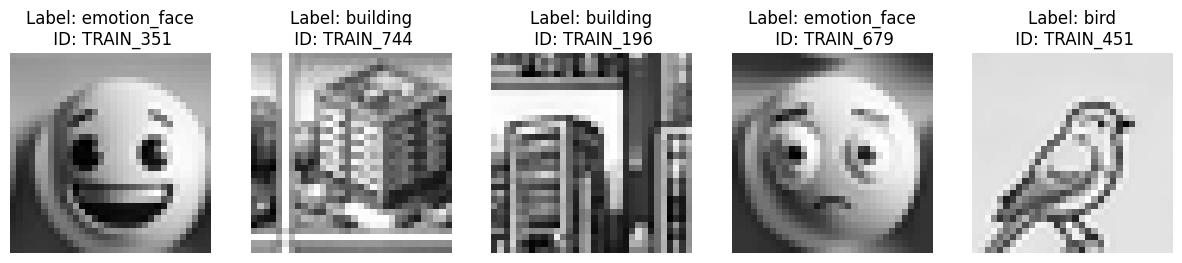

In [84]:
# Image Visualization
random_indices = np.random.choice(len(train_data), 5, replace=False)
samples = train_data.iloc[random_indices]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, (index, sample) in enumerate(samples.iterrows()):
    axes[i].imshow(sample.iloc[2:].values.astype(np.uint8).reshape(32, 32), cmap='gray')
    axes[i].set_title(f"Label: {sample['label']}\n ID: {sample['ID']}")
    axes[i].axis('off')

plt.show()

In [85]:
#Preprocessing
df = train_data.drop(columns=["ID"])

#Seperate features and labels
features = df.iloc[:, 1:].values
labels = df.iloc[:, 0].values

In [86]:
# Encoding categorical data
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

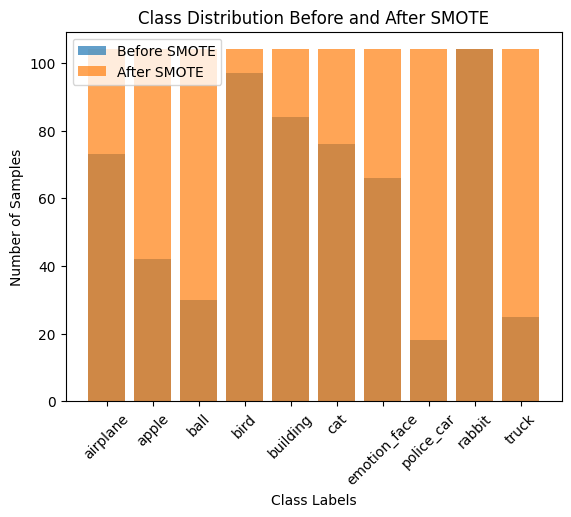

In [87]:
# Normalization
features = features / 255.0


# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences of each class before SMOTE
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(label_encoder.inverse_transform(unique), counts, alpha=0.7, label="Before SMOTE")

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Count occurrences of each class after SMOTE
unique_balanced, counts_balanced = np.unique(y_train_balanced, return_counts=True)
plt.bar(label_encoder.inverse_transform(unique_balanced), counts_balanced, alpha=0.7, label="After SMOTE")

plt.xticks(rotation=45)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution Before and After SMOTE")
plt.legend()
plt.show()


In [88]:
print(f"Before SMOTE: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"After SMOTE: X_train_balanced: {X_train_balanced.shape}, y_train_balanced: {y_train_balanced.shape}")


Before SMOTE: X_train: (615, 1024), y_train: (615,)
After SMOTE: X_train_balanced: (1040, 1024), y_train_balanced: (1040,)


In [89]:
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

SVM Accuracy: 0.78


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train on balanced data
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Show classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.86
              precision    recall  f1-score   support

    airplane       0.76      0.59      0.67        22
       apple       1.00      1.00      1.00         9
        ball       1.00      0.86      0.92         7
        bird       0.79      0.86      0.83        22
    building       0.95      0.88      0.91        24
         cat       0.92      0.79      0.85        14
emotion_face       0.76      1.00      0.86        22
  police_car       1.00      1.00      1.00         3
      rabbit       0.88      0.92      0.90        24
       truck       1.00      1.00      1.00         7

    accuracy                           0.86       154
   macro avg       0.91      0.89      0.89       154
weighted avg       0.87      0.86      0.86       154



In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300)  # Reduce to 300 principal components
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test)

# Train Random Forest on PCA-reduced data
rf_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train_balanced)

# Predict
y_pred_pca = rf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest with PCA Accuracy: {accuracy_pca:.2f}")


Random Forest with PCA Accuracy: 0.77


In [92]:
# Decode
# Convert numeric predictions to original string labels
predicted_labels = label_encoder.inverse_transform(y_pred)
print(predicted_labels[:10])  # Print first 10 predictions

['bird' 'emotion_face' 'rabbit' 'emotion_face' 'building' 'rabbit' 'bird'
 'bird' 'rabbit' 'emotion_face']


In [93]:
# Compare predicted vs actual labels
true_labels = label_encoder.inverse_transform(y_test)  # Convert y_test back to original labels

for i in range(10):  # Print the first 10 comparisons
    print(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")


Predicted: bird, Actual: airplane
Predicted: emotion_face, Actual: emotion_face
Predicted: rabbit, Actual: cat
Predicted: emotion_face, Actual: emotion_face
Predicted: building, Actual: building
Predicted: rabbit, Actual: rabbit
Predicted: bird, Actual: bird
Predicted: bird, Actual: bird
Predicted: rabbit, Actual: rabbit
Predicted: emotion_face, Actual: emotion_face


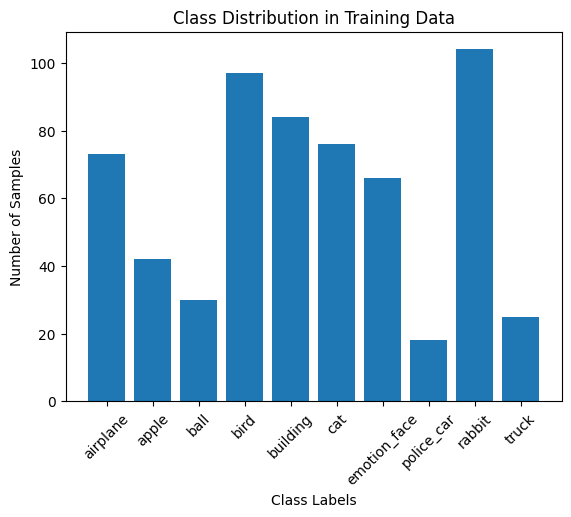

In [94]:
# Check class distribution
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(label_encoder.inverse_transform(unique), counts)
plt.xticks(rotation=45)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.show()


In [95]:

# CNN
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt



In [96]:
# Assume 'features' contains flattened grayscale images (samples, 1024)
# Assume 'labels' contains string labels like "cat", "building", etc.
train_data = pd.read_csv('open/train.csv')

#Preprocessing
df = train_data.drop(columns=["ID"])

#Seperate features and labels
features = df.iloc[:, 1:].values
labels = df.iloc[:, 0].values


# Normalize pixel values (0-255 → 0-1)
features = features / 255.0

# Reshape to (32, 32, 1) since it's grayscale
features_reshaped = features.reshape(-1, 32, 32, 1)  # (samples, height, width, channels)

# Encode labels into numbers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, labels_encoded, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape}, Testing samples: {X_test.shape}")
print(f"Unique classes: {label_encoder.classes_}")



Training samples: (615, 32, 32, 1), Testing samples: (154, 32, 32, 1)
Unique classes: ['airplane' 'apple' 'ball' 'bird' 'building' 'cat' 'emotion_face'
 'police_car' 'rabbit' 'truck']


In [97]:
# Reshape for SMOTE (SMOTE requires 2D inputs)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_flattened, y_train)

# Reshape back for CNN
X_train_balanced = X_train_balanced.reshape(-1, 32, 32, 1)

print(f"Training Set Before SMOTE: {X_train.shape}, After SMOTE: {X_train_balanced.shape}")


Training Set Before SMOTE: (615, 32, 32, 1), After SMOTE: (1040, 32, 32, 1)


In [98]:
datagen = ImageDataGenerator(
    rotation_range=15, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train_balanced)


In [99]:
cnn_model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(len(np.unique(labels)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()


/Users/kaicho/Develop/Dacon/Image-classification/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,250 (9.44 MB)

 Trainable params: 2,473,354 (9.44 MB)

 Non-trainable params: 896 (3.50 KB)

In [100]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = cnn_model.fit(
    datagen.flow(X_train_balanced, y_train_balanced, batch_size=64),
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr]
)


Epoch 1/100


/Users/kaicho/Develop/Dacon/Image-classification/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.2701 - loss: 5.0770 - val_accuracy: 0.1169 - val_loss: 2.5928 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5916 - loss: 1.1965 - val_accuracy: 0.1558 - val_loss: 5.9960 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7055 - loss: 0.8721 - val_accuracy: 0.1558 - val_loss: 9.3358 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7469 - loss: 0.7180 - val_accuracy: 0.1558 - val_loss: 11.7071 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7945 - loss: 0.5782 - val_accuracy: 0.1558 - val_loss: 15.5589 - learning_rate: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8248 - loss: 0.5273 - val_accuracy: 0.1558 - val_loss: 17.2708 - learning_rate: 0.0010
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8521 - loss: 0.4546 - val_accur

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9050 - loss: 0.2998
Test Accuracy: 0.90


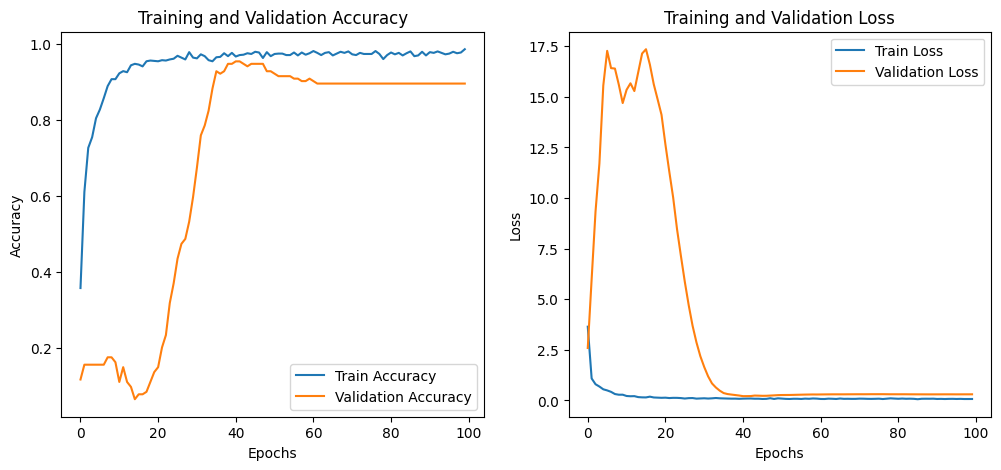

In [101]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


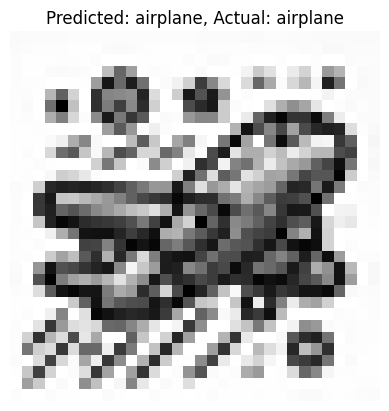

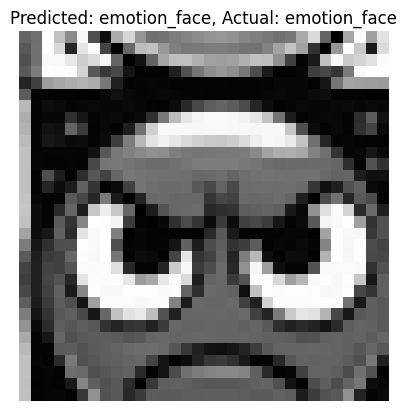

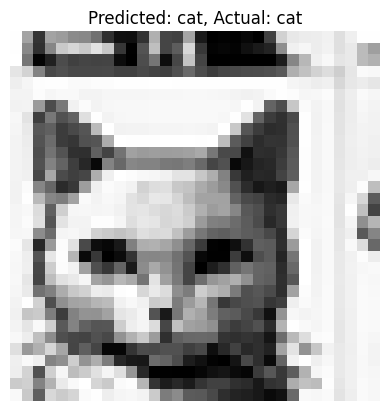

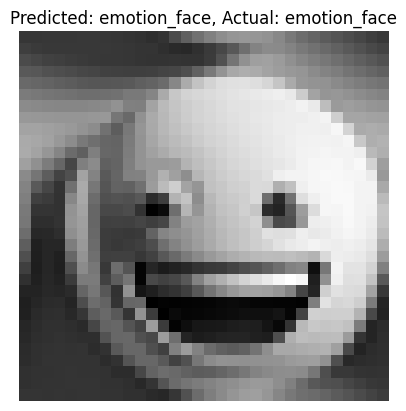

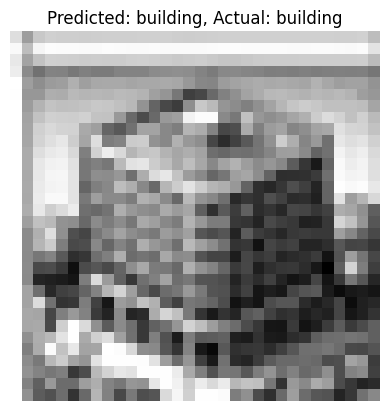

In [102]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

# Show sample results
for i in range(5):
    plt.imshow(X_test[i].reshape(32,32), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {label_encoder.inverse_transform([y_test[i]])[0]}")
    plt.axis('off')
    plt.show()
